In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sklearn.datasets as sd
import sklearn.preprocessing as sp
import sklearn.feature_extraction.text as ft
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.tree as st
import sklearn.ensemble as se
import sklearn.naive_bayes as nb
import sklearn.svm as svm
import sklearn.metrics as sm



In [53]:
data_ori = pd.read_csv("GSE122246_AST.bcmatrix.csv")

data = data_ori.T
data.head(10)



# column_names=data_ori["GENE"]

# data = pd.DataFrame(data_ori.T,columns=column_names)
# data

,0,1,2,3,4,5,6,7,8,9,...,20803,20804,20805,20806,20807,20808,20809,20810,20811,20812
GENE,SEC24B-AS1,A1BG,A1CF,GGACT,A2M,A2ML1,A2MP1,A4GALT,A4GNT,AAAS,...,ERCC-00042,ERCC-00069,ERCC-00084,ERCC-00097,ERCC-00112,ERCC-00131,ERCC-00136,ERCC-00157,ERCC-00171,LABEL
IonXpress_001,19,0,56,9,1588,1,2,143,0,259,...,0,0,0,0,0,0,0,0,0,1
IonXpress_002,3,0,60,7,1228,0,3,70,0,315,...,0,0,0,0,0,0,0,0,0,1
IonXpress_003,7,1,168,15,994,0,0,116,0,329,...,0,0,0,0,0,0,0,0,0,1
IonXpress_005,12,0,33,13,958,0,0,35,0,164,...,0,0,0,0,0,0,0,0,0,1
IonXpress_007,6,2,67,11,766,2,1,64,2,144,...,0,0,0,0,0,0,0,0,0,1
IonXpress_008,7,0,46,7,927,0,0,32,0,110,...,0,0,0,0,0,0,0,0,0,1
IonXpress_010,0,4,12,19,2031,0,0,127,0,206,...,0,0,0,0,0,0,0,0,0,1
IonXpress_011,10,73,27,33,2929,0,0,282,0,196,...,0,0,0,0,0,0,0,0,0,1
IonXpress_016,13,0,411,8,669,0,0,29,1,343,...,0,0,0,0,0,0,0,0,0,1


In [54]:
data.columns = data.iloc[0,0:]
data = data.drop(["GENE"],axis=0)
data

GENE,SEC24B-AS1,A1BG,A1CF,GGACT,A2M,A2ML1,A2MP1,A4GALT,A4GNT,AAAS,...,ERCC-00042,ERCC-00069,ERCC-00084,ERCC-00097,ERCC-00112,ERCC-00131,ERCC-00136,ERCC-00157,ERCC-00171,LABEL
IonXpress_001,19,0,56,9,1588,1,2,143,0,259,...,0,0,0,0,0,0,0,0,0,1
IonXpress_002,3,0,60,7,1228,0,3,70,0,315,...,0,0,0,0,0,0,0,0,0,1
IonXpress_003,7,1,168,15,994,0,0,116,0,329,...,0,0,0,0,0,0,0,0,0,1
IonXpress_005,12,0,33,13,958,0,0,35,0,164,...,0,0,0,0,0,0,0,0,0,1
IonXpress_007,6,2,67,11,766,2,1,64,2,144,...,0,0,0,0,0,0,0,0,0,1
IonXpress_008,7,0,46,7,927,0,0,32,0,110,...,0,0,0,0,0,0,0,0,0,1
IonXpress_010,0,4,12,19,2031,0,0,127,0,206,...,0,0,0,0,0,0,0,0,0,1
IonXpress_011,10,73,27,33,2929,0,0,282,0,196,...,0,0,0,0,0,0,0,0,0,1
IonXpress_016,13,0,411,8,669,0,0,29,1,343,...,0,0,0,0,0,0,0,0,0,1
IonXpress_018,3,0,167,2,3106,0,1,109,1,162,...,0,0,0,0,0,0,0,0,0,1


In [55]:
data.shape

(24, 20813)

In [56]:
# 整理输入集与输出集
x = data.iloc[:,0:-1] 
y = data.iloc[:,-1] 
y=y.astype("int32")

x = x.astype("float")
x[x==0] += 1e-8
x=np.log2(x)


rand_seed = 7
train_x,test_x,train_y,test_y=\
    ms.train_test_split(x,y,test_size=0.1,stratify=y,random_state=rand_seed)
x

GENE,SEC24B-AS1,A1BG,A1CF,GGACT,A2M,A2ML1,A2MP1,A4GALT,A4GNT,AAAS,...,ERCC-00031,ERCC-00042,ERCC-00069,ERCC-00084,ERCC-00097,ERCC-00112,ERCC-00131,ERCC-00136,ERCC-00157,ERCC-00171
IonXpress_001,4.247928,-26.575425,5.807355,3.169925,10.632995,0.000000,1.000000,7.159871,-26.575425,8.016808,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425
IonXpress_002,1.584963,-26.575425,5.906891,2.807355,10.262095,-26.575425,1.584963,6.129283,-26.575425,8.299208,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425
IonXpress_003,2.807355,0.000000,7.392317,3.906891,9.957102,-26.575425,-26.575425,6.857981,-26.575425,8.361944,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425
IonXpress_005,3.584963,-26.575425,5.044394,3.700440,9.903882,-26.575425,-26.575425,5.129283,-26.575425,7.357552,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425
IonXpress_007,2.584963,1.000000,6.066089,3.459432,9.581201,1.000000,0.000000,6.000000,1.000000,7.169925,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425
IonXpress_008,2.807355,-26.575425,5.523562,2.807355,9.856426,-26.575425,-26.575425,5.000000,-26.575425,6.781360,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425
IonXpress_010,-26.575425,2.000000,3.584963,4.247928,10.987975,-26.575425,-26.575425,6.988685,-26.575425,7.686501,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425
IonXpress_011,3.321928,6.189825,4.754888,5.044394,11.516192,-26.575425,-26.575425,8.139551,-26.575425,7.614710,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425
IonXpress_016,3.700440,-26.575425,8.682995,3.000000,9.385862,-26.575425,-26.575425,4.857981,0.000000,8.422065,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425
IonXpress_018,1.584963,-26.575425,7.383704,1.000000,11.600842,-26.575425,0.000000,6.768184,0.000000,7.339850,...,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425,-26.575425


In [57]:
# 交叉验证
# model = lm.LogisticRegression(random_state=rand_seed)
# model = svm.SVC(kernel="linear",C=1)
# model = st.DecisionTreeClassifier(max_depth=3,min_samples_split=2,random_state=rand_seed)
model = se.RandomForestClassifier(max_depth=6,min_samples_split=2,n_estimators=400,random_state=rand_seed)
# model = nb.MultinomialNB()

score_f1 = ms.cross_val_score(model,x,y,cv=5,scoring="f1_weighted")
print(score_f1.mean())


0.6214285714285713


In [58]:
#训练模型
model.fit(x,y)
pred_test_y = model.predict(test_x)

#测试模型，评估模型
m = sm.confusion_matrix(test_y,pred_test_y) #混淆矩阵
print(m)
print(sm.classification_report(test_y,pred_test_y))

[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



GENE
OR5P2       0.005320
PBX3        0.005316
KRTAP4-3    0.005311
LAMB3       0.005000
ITPKA       0.004750
              ...   
SERPINF1    0.001773
CLIC3       0.001773
KLHL4       0.001773
KDM4B       0.001773
RPS6KA1     0.001773
Length: 200, dtype: float64


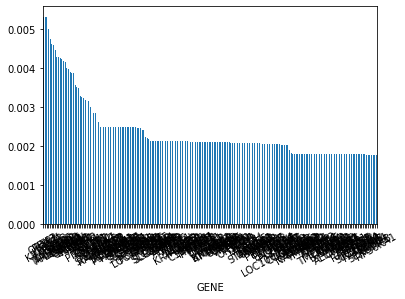

In [59]:
fi=model.feature_importances_
s=pd.Series(fi,index=train_x.columns)
s = s.sort_values(ascending=False)
s.head(200).plot.bar(rot=30)
print(s.head(200))
# s.sort_values(ascending=False)

(0.0, 15.0)

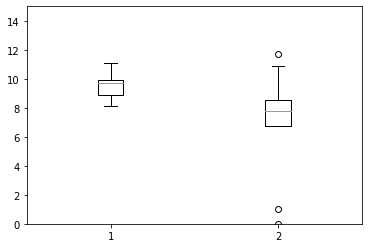

In [60]:
interested_gene=pd.Series(s.head(10).index)



bad_samples = x[interested_gene].iloc[0:12]
good_samples = x[interested_gene].iloc[12:]

# ax = bad_samples.iloc[0].plot.box()
# # plt.figure()
# good_samples.iloc[0].plot.box()

plt.boxplot([bad_samples[bad_samples.columns[5]],good_samples[good_samples.columns[5]]])
plt.ylim((0,15))

In [61]:
bad_samples[bad_samples.columns[0]]

IonXpress_001     3.321928
IonXpress_002   -26.575425
IonXpress_003   -26.575425
IonXpress_005   -26.575425
IonXpress_007     0.000000
IonXpress_008   -26.575425
IonXpress_010   -26.575425
IonXpress_011     1.584963
IonXpress_016   -26.575425
IonXpress_018   -26.575425
IonXpress_021     0.000000
IonXpress_024   -26.575425
Name: OR5P2, dtype: float64

In [62]:
good_samples

GENE,OR5P2,PBX3,KRTAP4-3,LAMB3,ITPKA,ELN,C1orf106,TMEM150B,IGFBP5,ARHGEF16
IonXpress_004,4.321928,4.087463,3.807355,5.857981,2.807355,6.727920,7.523562,6.870365,7.087463,6.643856
IonXpress_006,2.321928,6.954196,3.584963,9.773139,6.066089,10.897089,10.250298,7.118941,12.676177,8.383704
IonXpress_009,0.000000,7.794416,1.584963,8.807355,5.930737,11.725792,7.546894,7.768184,13.543878,7.629357
IonXpress_012,2.321928,5.392317,1.000000,9.938109,5.044394,8.189825,10.099348,7.592457,9.339850,10.361944
IonXpress_013,3.459432,4.643856,1.584963,8.312883,4.857981,7.900867,9.000000,6.149747,10.784635,6.894818
IonXpress_014,1.000000,-26.575425,0.000000,1.000000,-26.575425,0.000000,-26.575425,-26.575425,1.000000,-26.575425
IonXpress_015,6.189825,5.426265,6.727920,7.199672,4.754888,7.330917,7.108524,5.523562,6.807355,6.584963
IonXpress_017,7.965784,6.209453,8.554589,5.614710,2.807355,9.620220,5.727920,5.807355,10.802516,5.754888
IonXpress_019,3.000000,4.523562,3.584963,7.988685,3.459432,7.857981,7.832890,4.857981,10.401946,6.599913
IonXpress_020,4.000000,5.392317,2.321928,8.577429,3.700440,7.643856,9.074141,7.108524,9.794416,8.321928


# 根据fi减小特征数量，重新训练模型

35


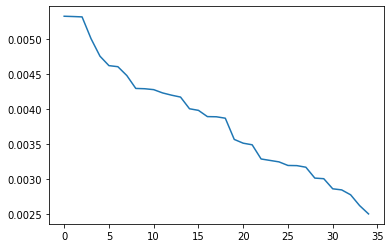

In [63]:
fi=model.feature_importances_
s=pd.Series(fi,index=train_x.columns)
s = s.sort_values(ascending=False).head(35)

print(len(s))
n=np.arange(len(s))
plt.plot(n,s)

In [64]:
interested_gene=pd.Series(s.head(35).index)
x_opti = x[interested_gene]

rand_seed = 7
train_x,test_x,train_y,test_y=\
    ms.train_test_split(x_opti,y,test_size=0.1,stratify=y,random_state=rand_seed)
test_y


IonXpress_013    0
IonXpress_016    1
IonXpress_021    1
Name: LABEL, dtype: int32

In [72]:
# 交叉验证
# model = lm.LogisticRegression(random_state=rand_seed)
# model = svm.SVC(kernel="linear",C=1)
# model = st.DecisionTreeClassifier(max_depth=6,min_samples_split=2,random_state=rand_seed)
model = se.RandomForestClassifier(max_depth=6,min_samples_split=2,n_estimators=400,random_state=rand_seed)
# model = nb.MultinomialNB()

score_f1 = ms.cross_val_score(model,train_x,train_y,cv=5,scoring="f1_weighted")
print(score_f1.mean())

0.8400000000000001


In [73]:
#训练模型
model.fit(train_x,train_y)
pred_test_y = model.predict(test_x)

#测试模型，评估模型
m = sm.confusion_matrix(test_y,pred_test_y) #混淆矩阵
print(m)
print(sm.classification_report(test_y,pred_test_y))

[[1 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



GENE
TTYH2       0.061430
ITGA11      0.048285
ITPKA       0.047721
EEPD1       0.045241
THBS2       0.044965
ELOVL1      0.044824
C1orf106    0.042178
OR5P2       0.041182
TMEM150B    0.040292
LEPREL2     0.037532
IGFBP5      0.037330
OR5M8       0.031785
PBX3        0.031476
SYTL4       0.031127
SLC24A3     0.031108
COL5A1      0.030181
ARHGEF16    0.026629
OR2T27      0.025590
GLTPD1      0.024599
LAMB3       0.024253
SFN         0.023871
KRTAP4-3    0.023048
OR13C8      0.022946
PPRC1       0.021798
ZNF511      0.020485
ZNF471      0.020470
ELN         0.018809
CRABP2      0.018324
PQLC1       0.017836
FNIP2       0.014804
PIP5K1P1    0.013242
HYOU1       0.012327
SNORD15B    0.009387
IFNA2       0.007507
OR2K2       0.007417
dtype: float64


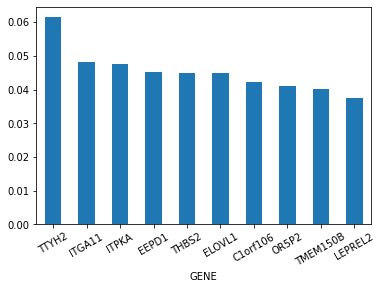

In [67]:
fi=model.feature_importances_
s=pd.Series(fi,index=train_x.columns)
s = s.sort_values(ascending=False)
s.head(10).plot.bar(rot=30)
print(s)